## Introduction to Data Processing in Pandas

## Dependencies
- Pandas python library.
- Basic knowledge of python and its data structures.

## Python data structure
- List: For 1-dimensional vectors e.g (1,2,3)
- Dictionary: For 2-dimensional vectors e.g {'first_name': 'Vitalis', 'last_name': 'Asiku'}

In [104]:
l_person = ["Pamela Akello", "17-04-2000", "Bsc Software Eng"]
l_person

['Pamela Akello', '17-04-2000', 'Bsc Software Eng']

In [105]:
d_person = {"name": "Pamela Akello", "dob": "17-04-2000", "course": "Bsc Software Eng"}
d_person

{'course': 'Bsc Software Eng', 'dob': '17-04-2000', 'name': 'Pamela Akello'}

## Pandas Intro
- It's a python library that provides utilities for working with data. Data can come from any source, excel, csv, databases etc.
It's akin to the excel of the modern world except better. No need for Macros.
- It consists of two basic datastructures:
    Series
    DataFrame: 
- Different data types: int, float, object.
- Multiple operations:
    - Where
    - Groupby
    - Unstack - creates a new DataFrame based on the index

## Series
- is a 1-dimensional vector/array i.e a row in a table. 
- Created using python list, tuple, dictionary data structure: (1,2,3)
- Index, is the label for the row. Defaults to ints (0,1,2,...) else, takes up the supplied value.

In [131]:
#Using a list. The index is the corresponding index of the list value (0,1,2,...)
s = pd.Series(l_person)
s

0       Pamela Akello
1          17-04-2000
2    Bsc Software Eng
dtype: object

In [132]:
#Using a dictionary. The index is the dictionary keys.
s = pd.Series(d_person)
s['name']

['Pamela Akello', 'Ben otim']

## DataFrame
- Is a 2-dimensional vector i.e a row and column. 
- Widely used in pandas.
- Uses two indexs, row-index and column-index
- Created using a dicitonary of equal length.

In [133]:
d_person = {
    "name": ['Pamela Akello', "Ben otim"],
    "age": [20,21],
    "course": ["Software Eng", "Computer Science"]
}
df = pd.DataFrame(d_person)
df

,age,course,name
0,20,Software Eng,Pamela Akello
1,21,Computer Science,Ben otim


## Basic statistics
- Descriptive statistics: Mean, Sum, Count, Standard Deviation.
- Interquartile range, Median

## Titanic Dataset
- One of the most widely used datasets for introduction to data anlysis.
- If you have already practiced with it before, well and good. This can still serve as a refresher, or perhaps you can ask more questions about it.
- 0-No, 1-Yes

In [134]:
import pandas as pd
%matplotlib inline

In [135]:
df = pd.read_csv('./titanic.csv')

In [136]:
## Get to know the dataset
df.shape

(891, 12)

In [137]:
# What are the columns
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Gender',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [138]:
# what are the first-n columns: where n=10
df.head(10)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [139]:
# What are the last-n columns: where n=5
df.tail(5)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [140]:
# What are the values of a particular column? 
df['Gender'].unique()

array(['male', 'female'], dtype=object)

## Univariate Analysis
- Descriptive statistics to see the distributions of one feature at a time.

## Proportions of passengers on the ship

# By Gender

In [141]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

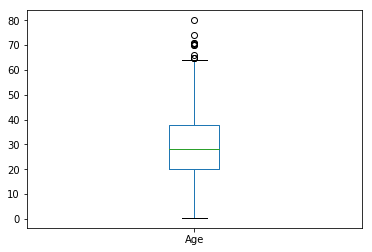

In [142]:
df['Age'].plot(kind='box')

In [143]:
# Who were these old people?
old_people = df[df['Age'] > 60]
old_people.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,432.545455,0.227273,1.590909,66.022727,0.136364,0.272727,41.371214
std,248.225460,0.428932,0.854071,5.024884,0.351250,0.882735,54.783357
min,34.000000,0.000000,1.000000,61.000000,0.000000,0.000000,6.237500
25%,258.750000,0.000000,1.000000,62.000000,0.000000,0.000000,10.500000
50%,470.500000,0.000000,1.000000,64.500000,0.000000,0.000000,26.550000
75%,612.250000,0.000000,2.000000,70.000000,0.000000,0.000000,45.791700
max,852.000000,1.000000,3.000000,80.000000,1.000000,4.000000,263.000000


In [144]:
df['Pclass'].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

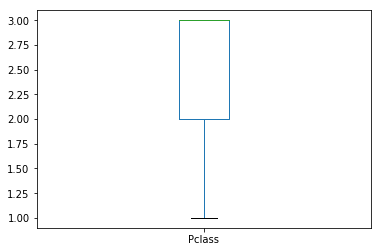

In [145]:
df['Pclass'].plot(kind='box')

In [146]:
age_ranges = pd.cut(df['Age'], 5)
age_ranges

0      (16.336, 32.252]
1      (32.252, 48.168]
2      (16.336, 32.252]
3      (32.252, 48.168]
4      (32.252, 48.168]
5                   NaN
6      (48.168, 64.084]
7        (0.34, 16.336]
8      (16.336, 32.252]
9        (0.34, 16.336]
10       (0.34, 16.336]
11     (48.168, 64.084]
12     (16.336, 32.252]
13     (32.252, 48.168]
14       (0.34, 16.336]
15     (48.168, 64.084]
16       (0.34, 16.336]
17                  NaN
18     (16.336, 32.252]
19                  NaN
20     (32.252, 48.168]
21     (32.252, 48.168]
22       (0.34, 16.336]
23     (16.336, 32.252]
24       (0.34, 16.336]
25     (32.252, 48.168]
26                  NaN
27     (16.336, 32.252]
28                  NaN
29                  NaN
             ...       
861    (16.336, 32.252]
862    (32.252, 48.168]
863                 NaN
864    (16.336, 32.252]
865    (32.252, 48.168]
866    (16.336, 32.252]
867    (16.336, 32.252]
868                 NaN
869      (0.34, 16.336]
870    (16.336, 32.252]
871    (32.252, 

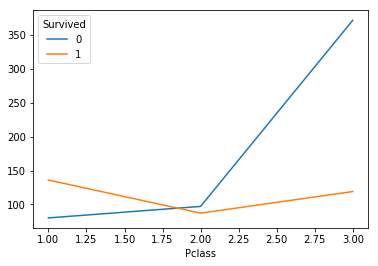

In [147]:
df.groupby(['Pclass', 'Survived']).size().unstack().plot()

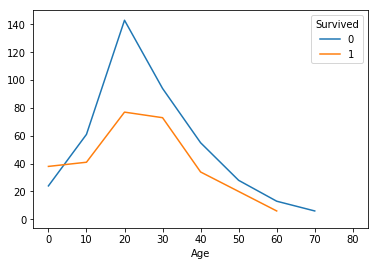

In [148]:
df.groupby([df['Age']//10*10, 'Survived']).size().unstack().plot()

In [154]:
df.groupby(['Gender', 'Survived']).size()

Gender  Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

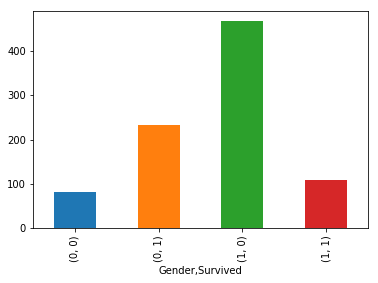

In [184]:
df.groupby(['Gender', 'Survived']).size().plot(kind='bar')

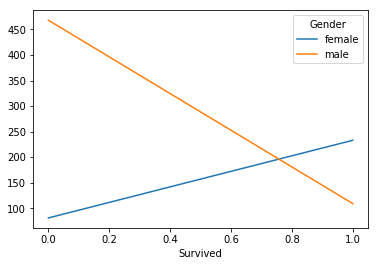

In [157]:
df.groupby(['Gender', 'Survived']).size().unstack(0).plot()

In [167]:
df['Gender'].describe()

count      891
unique       2
top       male
freq       577
Name: Gender, dtype: object

In [173]:
df['Gender'] = df['Gender'].astype('category').cat.codes

In [174]:
df.corr()

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500
Gender,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000


In [177]:
## Crosstab
gender_ct = pd.crosstab(df['Gender'], df['Survived'])

[Text(0,0.5,'# Survived'), Text(0.5,0,'Gender, 0=Male, 1= Female')]

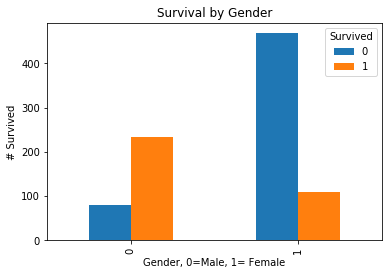

In [180]:
ax = gender_ct.plot(kind='bar', title='Survival by Gender')
ax.set(xlabel='Gender, 0=Male, 1= Female', ylabel='# Survived')

[Text(0,0.5,'Survived'), Text(0.5,0,'Class')]

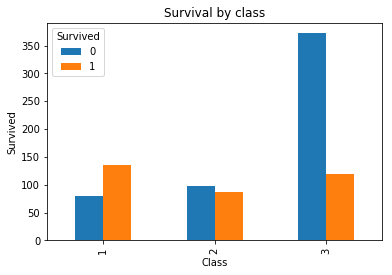

In [186]:
ctb = pd.crosstab(df['Pclass'], df['Survived'])
ax = ctb.plot(kind='bar', title='Survival by class')
ax.set(xlabel='Class', ylabel='Survived')